# Association Rules Mining
By Josh Houlding

Data mining is used to locate beneficial information by finding anomalies, patterns, or correlations within data. Association rules mining uses "if-then" statements to show the most important relationships between data. Some real-world examples of its use include medical diagnosis, purchasing patterns, consumer website usages, or content recommendation engines.

# Part 1

To perform association rules analysis/mining, complete the following:
1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.
2. Ensure that the data sets are suitable for clustering using this method.
3. You may search for data in other repositories, such as Data.gov or Kaggle.

# Part 2

For your selected dataset, build a clustering model as follows:
1. Explain the dataset and the type of information you wish to extract. Recall that the dataset must consist of transactions of the form If {x1, x2, …, xn} then {y1, y2, …, yk}.
2. Explain the Apriori algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).
3. Identify the appropriate software packages.
4. Preprocess the data, describe their characteristics, and visualize key characteristics like popular items and choices.
5. Build the clustering model by implementing the Apriori algorithm.
6. Run the model (make predictions).
7. Display clustering results (quantitative and visual).
8. Explain the meaning of each step in the context of the dataset.
9. Interpret results and adjust your clustering.
10. Validate the model, addressing support, confidence, lift, and conviction. Then, explain the results.

# <span style="color:#8080ff">Part 1</span>

# Tasks 1.1-1.3

<b>1.1:</b><i> Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.</i>

<b>1.2:</b><i> Ensure that the data sets are suitable for clustering using this method.</i>

<b>1.3:</b><i> You may search for data in other repositories, such as Data.gov or Kaggle.</i>

<b>Dataset Selected:</b> "Bank Marketing" (UCI Machine Learning Repository) <br>
<b>Tagline:</b> "The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)." <br>
<b>Link:</b> https://archive.ics.uci.edu/dataset/222/bank+marketing

# <span style="color:#1f6635">Part 2</span>

# Task 2.1
<i>Explain the dataset and the type of information you wish to extract. Recall that the dataset must consist of transactions of the form If {x1, x2, …, xn} then {y1, y2, …, yk}.</i>

The data contains various phone calls made by a Portuguese banking institution to clients, and can be used to predict whether they will subscribe to a term deposit. Each entry in the dataset can be treated as a transaction, and we can mine it for association rules by looking at the relationships between features.

# Task 2.2
<i>Explain the Apriori algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions).</i>

The Apriori algorithm is a technique used to mine association rules from transactions. These transactions, also known as itemsets, are simply entries in a dataset that each consist of multiple features (items). The algorithm runs through the following procedure: 

1. A threshold is determined, and the algorithm finds all itemsets that are subsets of at least $k$ itemsets in the dataset. 
2. Candidate itemsets of length $k$ are generated, and the algorithm then selects the most frequent of these. 
3. These most frequent itemsets are then used to find association rules. 

This algorithm makes several assumptions, including that if an itemset is frequent, then all its subsets and supersets will also be frequent. It also assumes that only itemsets that meet or exceed the defined threshold are frequent enough to be worthy of further examination.

# Task 2.3
<i>Identify the appropriate software packages.</i>

The `mlxtend` package is a machine learning Python package that contains useful tools for association rule mining. As such, we will be using it extensively throughout this assignment. Of course, `pandas` will also be instrumental in loading and manipulating the data, and other common libraries like `numpy`, `matplotlib` and `seaborn` will also be useful for common manipulation and visualization tasks. Finally, certain parts of `scikit-learn` such as the `MinMaxScaler` will be useful for normalizing the data before modeling.

# Task 2.4
<i>Preprocess the data, describe their characteristics, and visualize key characteristics like popular items and choices.</i>

### Loading the data

In [163]:
import pandas as pd

# Load and view data
df = pd.read_csv("bank-full.csv", delimiter=";")
print(f"Data shape: {df.shape}")
df.head()

Data shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


`y` is the label for this dataset, which would be necessary for a classification task. However, we are mining association rules using unsupervised machine learning, so it can be removed. 

In [164]:
# Drop label
df.drop(columns={"y"}, inplace=True)

### Variable Information (from UCI ML Repo page)
* `age`: How old the client is. 
* `job`: The type of job the client works (management, blue-collar, technician, retired, etc.) 
* `marital`: The client's marital status (married, divorced, single). 
* `education`: The client's education level. 
* `default`: Whether or not the client has credit in default. 
* `balance`: The client's average monthly balance in euros. 
* `housing`: Whether or not the client has a housing loan.
* `loan`: Whether or not the client has a personal loan.
* `contact`: The type of communication the bank used to contact the client. 
* `day`: The last day the client was contacted that particular month.
* `month`: The last month the client was contacted. 
* `duration`: The length of the last communication with the client (s). 
* `campaign`: The number of times the bank contacted the client during the current campaign.
* `pdays`: The number of days that have passed since the client was last contacted during a previous campaign. -1 means the client was not previously contacted.
* `previous`: The number of times the bank contacted the client before this campaign. 
* `poutcome`: The outcome of the previous campaign for this particular client ("success", "failure", "other", "unknown"). 

### Renaming columns

In [165]:
# Create new names for columns
new_column_mapping = {"job": "job_type", "default": "in_default", "balance": "avg_monthly_balance",
                      "housing": "housing_loan", "loan": "personal_loan", "contact": "contact_method",
                      "campaign": "times_contacted", "pdays": "days_since_last_contact",
                      "previous": "previous_contact_count", "poutcome": "previous_campaign_outcome"}

# Apply mapping to dataframe
df.rename(columns=new_column_mapping, inplace=True)

# Show new column names
df.columns

Index(['age', 'job_type', 'marital', 'education', 'in_default',
       'avg_monthly_balance', 'housing_loan', 'personal_loan',
       'contact_method', 'day', 'month', 'duration', 'times_contacted',
       'days_since_last_contact', 'previous_contact_count',
       'previous_campaign_outcome'],
      dtype='object')

### Showing dataset info

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job_type                   45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   in_default                 45211 non-null  object
 5   avg_monthly_balance        45211 non-null  int64 
 6   housing_loan               45211 non-null  object
 7   personal_loan              45211 non-null  object
 8   contact_method             45211 non-null  object
 9   day                        45211 non-null  int64 
 10  month                      45211 non-null  object
 11  duration                   45211 non-null  int64 
 12  times_contacted            45211 non-null  int64 
 13  days_since_last_contact    45211 non-null  int64 
 14  previo

There are quite a few `object` columns in the data that will need to be converted to a numeric format before modeling can take place.

### Describing numeric columns

In [167]:
df.describe().round(2)

,age,avg_monthly_balance,day,duration,times_contacted,days_since_last_contact,previous_contact_count
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


The "average" client is 41 years old, has an average monthly balance of <span>~&euro;1,362</span>, and was spoken to by the bank for 258 seconds (just over 4 minutes). 

### Removing duplicates

In [168]:
# Find number of duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


Duplicate rows will not be an issue for this data. 

### Handling missing values

In [169]:
# Find number of rows with missing values
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")
print(f"Total number of rows: {len(df)}")

Number of rows with missing values: 0
Total number of rows: 45211


There are no `NaN` values present in the data, but our examination of the head of the dataset earlier showed that many "unknown" values are present. Thus, these need to be dealt with to make the data as complete as possible.

In [170]:
import numpy as np

# Ensure all text data is lowercase
object_columns = df.select_dtypes(include=["object"]).columns
for col in object_columns: 
    df[col] = df[col].str.lower()
    
# Replace all "unknown" values with NaN
df.replace("unknown", np.nan, inplace=True)

# Find the number of missing values in each column
print("Missing variable count by column:")
print(df.isna().sum())

Missing variable count by column:
age                              0
job_type                       288
marital                          0
education                     1857
in_default                       0
avg_monthly_balance              0
housing_loan                     0
personal_loan                    0
contact_method               13020
day                              0
month                            0
duration                         0
times_contacted                  0
days_since_last_contact          0
previous_contact_count           0
previous_campaign_outcome    36959
dtype: int64


We see that `job_type`, `education`, `contact_method`, and `previous_campaign_outcome` are responsible for the missing values. Each should be treated according to what proportion of its values are missing. First of all, `previous_campaign_outcome` has so many missing values that it should be outright dropped. Let's take a look at the value counts for the remaining 3 columns to determine what should be done.

In [171]:
# Drop "previous_campaign_outcome" due to large number of missing values
df.drop(columns={"previous_campaign_outcome"}, inplace=True)

# Show value counts of each column with missing values
missing_columns = ["job_type", "education", "contact_method"]
for col in missing_columns: 
    print(df[col].value_counts(), "\n")

job_type
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64 

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64 

contact_method
cellular     29285
telephone     2906
Name: count, dtype: int64 



We see a somewhat-even spread of job types, so missing values in `job_type` should be filled with a random selection from the top 3 values ("blue-collar", "management", and "technician"). Then, `education` and `contact_method` should be filled in according to the proportions in which their values occur (eg. about 90% of values for `contact_method` are "cellular", so for a given missing value, there should be a 90% chance of filling in "cellular" and a 10% chance of filling in "telephone"). 

In [172]:
# Set random seed for consistency of results
np.random.seed(42)

# Fill in missing "job_type" values
df["job_type"] = np.random.choice(["blue-collar", "management", "technician"], size=len(df), replace=True)

# Fill in missing "education" values
education_probs = [0.54, 0.31, 0.15]
df["education"] = np.random.choice(["secondary", "tertiary", "primary"], size=len(df), p=education_probs, replace=True)

# Fill in missing "contact_method" values
contact_probs = [0.91, 0.09]
df["contact_method"] = np.random.choice(["cellular", "telephone"], size=len(df), p=contact_probs, replace=True)

# Recheck number of rows with missing values
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Number of rows with missing values: 0


### Converting data types
All `object` columns need to be converted to a numeric format so they can be used in modeling. This includes `marital`, `education`, `in_default`, `housing_loan`, `personal_loan`, `contact_method`, and `month`. The following encoding techniques are appropriate for each column based on its values: 

* <b>Binary columns</b> `in_default`, `housing_loan`, `personal_loan`: Label encoding
* <b>Nominal columns</b> `job_type`, `marital`, `contact_method`: One-hot encoding
* <b>Ordinal columns</b> `education` and `month`: Label encoding

In [173]:
# Select categorical columns
binary_columns = ["in_default", "housing_loan", "personal_loan"]
nominal_columns = ["job_type", "marital", "education", "contact_method"]
ordinal_columns = ["education", "month"]

# Apply label encoding to binary columns
for col in binary_columns: 
    df[col] = np.where(df[col] == "no", 0, 1)

# Encode "month" into numeric format    
month_mapping = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
"nov": 11, "dec": 12}
df["month"] = df["month"].map(month_mapping)
    
# Apply one-hot encoding to other columns
df = pd.get_dummies(df, columns=nominal_columns, drop_first=False)

# Convert bool columns to int
for col in df.columns:
    if df[col].dtype == "bool": 
        df[col] = df[col].astype(int)
        
# Display new data type counts
df.dtypes.value_counts()

int32    14
int64     8
Name: count, dtype: int64

### Normalizing features

In [174]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric variables not already on [0, 1] scale
scaler = MinMaxScaler()
cols_to_normalize = ["age", "avg_monthly_balance", "day", "month", "duration", "times_contacted", "days_since_last_contact",
                     "previous_contact_count"]
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df.head()

,age,in_default,avg_monthly_balance,housing_loan,personal_loan,day,month,duration,times_contacted,days_since_last_contact,...,job_type_management,job_type_technician,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_method_cellular,contact_method_telephone
0,0.519481,0,0.092259,1,0,0.133333,0.363636,0.053070,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
1,0.337662,0,0.073067,1,0,0.133333,0.363636,0.030704,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
2,0.194805,0,0.072822,1,1,0.133333,0.363636,0.015453,0.0,0.0,...,0,1,0,1,0,1,0,0,0,1
3,0.376623,0,0.086476,1,0,0.133333,0.363636,0.018707,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,0.194805,0,0.072812,0,0,0.133333,0.363636,0.040260,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0


The data is now ready to be mined for association rules.

# Task 2.5
<i>Build the clustering model by implementing the Apriori algorithm.</i>

The Apriori algorithm cannot be used for clustering, only for finding frequent itemsets and association rules, so we will take the approach of clustering the data using k-means first, then applying Apriori to each cluster to mine frequent itemsets and association rules.

To start, we will apply the Elbow Method to determine the optimal number of clusters, $k$. 

### Finding optimal number of clusters

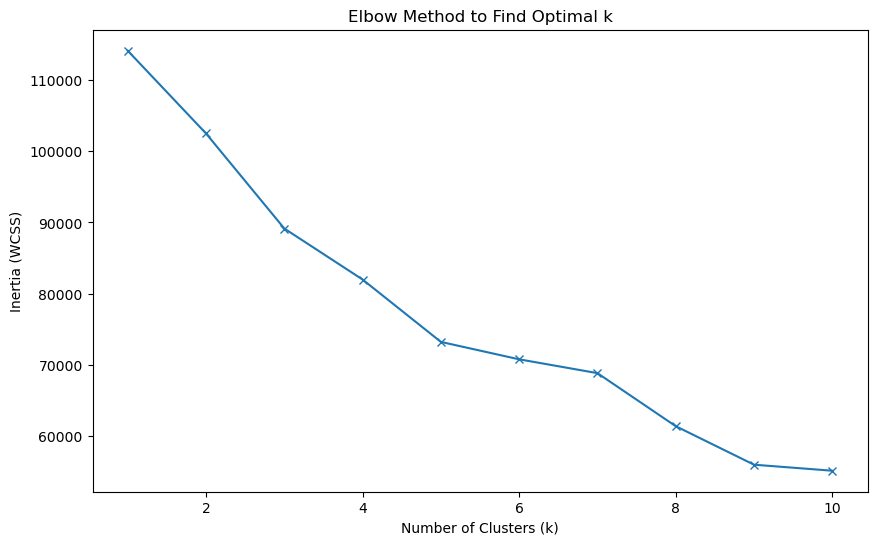

In [175]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range of k-values to test
k_vals = range(1, 11)
inertia = []

# Calculate inertia for each k-value
for k in k_vals: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
# Plot inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_vals, inertia, marker="x")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method to Find Optimal k")
plt.show()

$k=2$ and $k=4$ would both be reasonable choices for $k$, but $k=4$ would provide more granularity in clustering, and so we will go with that.

### Running k-means clustering

In [176]:
# Define optimal k
k = 4

# Run k-means clustering and assign each entry to a cluster
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(df)

# Show cluster sizes
cluster_sizes = df["cluster"].value_counts().to_frame()
cluster_sizes = cluster_sizes.sort_values(by="cluster", ascending=True)
cluster_sizes = cluster_sizes.reset_index()
cluster_sizes

,cluster,count
0,0,15973
1,1,5207
2,2,11241
3,3,12790


### Visualizing clustering results
First, the dimensionality of the data must be reduced to 2 using PCA.

In [177]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality of data
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df.drop("cluster", axis=1))

# Store PCA results and cluster labels
df_pca = pd.DataFrame(data=df_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df["cluster"]

# Define cluster centers
centers = pca.transform(kmeans.cluster_centers_)

C:\Users\jdh10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Then, the clustering results can be visualized in a scatterplot:

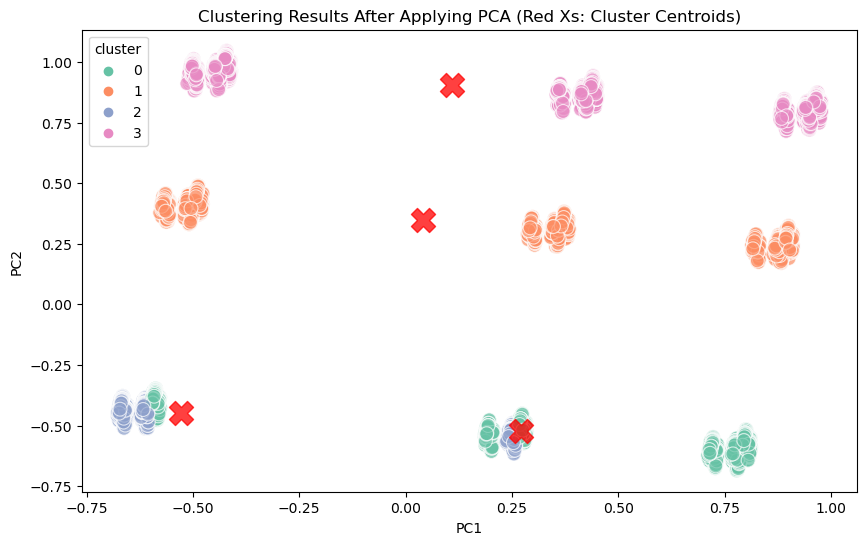

In [178]:
# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="cluster", palette="Set2", s=100, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=300, alpha=0.75, marker="X")
plt.title("Clustering Results After Applying PCA (Red Xs: Cluster Centroids)")
plt.show()

### Applying Apriori to clusters
Now that our data is clustered appropriately, we can mine association rules and frequent itemsets from each cluster. This can be done by iterating through each cluster, encoding its data into transactional format, and finding the rules and itemsets.

In [179]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Define minimum support for discovery of frequent itemsets
min_support = 0.1

# Initialize TransactionEncoder
te = TransactionEncoder()

# Create storage for cluster numbers, frequent itemsets and association rules
cluster_numbers = [0, 1, 2, 3]
clust_data = []
freq_itemsets = []
assoc_rules = []

# Iterate through clusters and find frequent itemsets and association rules for each
for cluster in cluster_numbers: 
    
    # Filter data to current cluster
    cluster_data = df[df["cluster"] == cluster].drop("cluster", axis=1)
    
    # Encode cluster data
    cluster_data = te.fit(cluster_data.values).transform(cluster_data.values)
    cluster_data = pd.DataFrame(cluster_data, columns=te.columns_)
    clust_data.append(cluster_data)
    
    # Find and print frequent itemsets
    frequent_itemsets = apriori(cluster_data, min_support=min_support, use_colnames=True)
    freq_itemsets.append(frequent_itemsets)
    
    # Find association rules
    if len(frequent_itemsets) > 0: 
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
        assoc_rules.append(rules)

# Task 2.6
<i>Run the model (make predictions).</i>

We now have the encoded data, frequent itemsets, and association rules for all four clusters. For the sake of conciseness, let's take a look at a few lines of each of these datasets for cluster 0.

In [180]:
print("Frequent Itemsets present in cluster 0:")
print(freq_itemsets[0].sample(5, random_state=42))
print("_____________________________\n")
print("Association Rules for cluster 0:")
print(assoc_rules[0].sample(5, random_state=42))
print("_____________________________\n")
print("Encoded cluster 0 data:")
print(f"Shape: {clust_data[0].shape}\n")
print(clust_data[0].sample(5, random_state=42))

Frequent Itemsets present in cluster 0:
     support                          itemsets
8   0.282852       (0.0, 0.016129032258064516)
13  0.153321         (0.0, 0.6363636363636364)
9   0.126839        (0.0, 0.03225806451612903)
21  0.282852  (0.0, 1.0, 0.016129032258064516)
0   1.000000                             (0.0)
_____________________________

Association Rules for cluster 0:
                    antecedents consequents  antecedent support  \
29    (0.0, 0.6363636363636364)       (1.0)            0.153321   
15  (0.016129032258064516, 1.0)       (0.0)            0.282852   
24    (0.4545454545454545, 1.0)       (0.0)            0.120829   
17   (0.0, 0.03225806451612903)       (1.0)            0.126839   
8        (0.016129032258064516)       (1.0)            0.282852   

    consequent support   support  confidence  lift  leverage  conviction  \
29                 1.0  0.153321         1.0   1.0       0.0         inf   
15                 1.0  0.282852         1.0   1.0       0.

We see that the data consists of only numbers and boolean values, and is also unlabeled. The encoded cluster data contains over 6,500 columns, and this makes it impossible to map encoded columns to features in the original dataset. Thus, it is difficult to pull any specific insights from these results.

However, it's clear that the frequent itemsets in cluster 0 have different support values, confirming that some features are more prevalent than others within the cluster. This suggests that the clustering provides some utility, though exactly how much is difficult to ascertain because there are no labels to work with.

# Task 2.7
<i>Display clustering results (quantitative and visual).</i>

The effectiveness of the clusters can be determined using two common metrics, the silhouette score and Davies-Bouldin Index. The former measures how well data points are assigned to their clusters vs. other clusters, and a score close to 1 indicates that clusters are well-separated. The latter measures the ratio of intra-cluster distances to inter-cluster distances, and a lower value suggests better cluster separation.

### Silhouette score
* <b>Close to 1:</b> The clusters are well-fit to the data.
* <b>Close to 0:</b> Some of the clusters are overlapping.
* <b>Close to -1:</b> The cluster assignments are wrong.

In [181]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(df, df["cluster"])
print(f"Silhouette score: {round(sil_score, 3)}")

Silhouette score: 0.297


### Davies-Bouldin Index

In [182]:
from sklearn.metrics import davies_bouldin_score

# Recompute labels
labels = kmeans.fit_predict(df)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(df, labels)
print(f"Davies-Bouldin Index: {round(db_index, 3)}")

Davies-Bouldin Index: 1.439


Our silhouette score of $0.297$ indicates that there is significant room for improvement in the clustering assignments, since a scored close to 1 would be ideal, while the Davies-Bouldin Index suggests a moderate amount of cluster separation. Adjusting initial parameters and/or data preprocessing steps could lead to more effective clustering.

# Task 2.8
<i>Explain the meaning of each step in the context of the dataset.</i>

1. <b>Data preprocessing:</b> Loading the dataset and performing preliminary processing steps like removing duplicates, handling missing values, renaming columns, normalizing numeric variables, and encoding categorical variables help convert the bank marketing data into a format suitable for k-means clustering and subsequent association rule mining.
2. <b>Clustering:</b> Separating customers into distinct clusters helps us find unique patterns among different customer segments, improving our understanding of their behavior. 
3. <b>Encoding clusters:</b> Encoding cluster data using the `TransactionEncoder` package from the `mlxtend` library helps get the data into a transactional format with only boolean values that the Apriori algorithm can use.
4. <b>Mining frequent itemsets and association rules:</b> Mining each cluster for frequently-occurring itemsets and association rules using the Apriori algorithm helps us understand client banking habits.

# Task 2.9
<i>Interpret results and adjust your clustering.</i>

As previously mentioned, the clustering results were of moderate quality per the silhouette score and Davies-Bouldin Index calculated earlier. Adjusting the clusters would not be of much use, as repeating the encoding and association rule mining processes with the new clusters would yield the same problem of non-interpretability as with the first runthrough. Without data labels though, there is nothing to connect the itemsets and association rules to the features they reference.

# Task 2.10
<i>Validate the model, addressing support, confidence, lift, and conviction. Then, explain the results.</i>

Let's take a look at the first five association rules uncovered by Apriori for cluster 1: 

In [184]:
# Display association rules for cluster 1
print("Association Rules for cluster 1:")
print(assoc_rules[0].sample(5, random_state=42))

Association Rules for cluster 1:
                    antecedents consequents  antecedent support  \
29    (0.0, 0.6363636363636364)       (1.0)            0.153321   
15  (0.016129032258064516, 1.0)       (0.0)            0.282852   
24    (0.4545454545454545, 1.0)       (0.0)            0.120829   
17   (0.0, 0.03225806451612903)       (1.0)            0.126839   
8        (0.016129032258064516)       (1.0)            0.282852   

    consequent support   support  confidence  lift  leverage  conviction  \
29                 1.0  0.153321         1.0   1.0       0.0         inf   
15                 1.0  0.282852         1.0   1.0       0.0         inf   
24                 1.0  0.120829         1.0   1.0       0.0         inf   
17                 1.0  0.126839         1.0   1.0       0.0         inf   
8                  1.0  0.282852         1.0   1.0       0.0         inf   

    zhangs_metric  
29            0.0  
15            0.0  
24            0.0  
17            0.0  
8      

For a given association rule: 
* The <b>support</b> is the proportion of transactions that contain both the antecedent (first itemset) and consequent (second itemset) of the rule. For the first rule given here (entry #29), the support is about 0.153, meaning that the itemsets (0,0, 0.63636...) and (1.0) appear together in about 15.3% of transactions within cluster 0. A higher support value means the combination of itemsets appears more often in the data.
* The <b>confidence</b> is the probability of finding the consequent in a transaction if it is given that the antecedent is already present. A stronger confidence level means that the two itemsets are more strongly related. We see a confidence value of 1.0 in all five association rules, indicating that the consequents and antecedents are all perfectly connected, though this could also indicate an issue.
* The <b>lift</b> is a multiplier representing how much more likely a random transaction containing itemset A is to contain itemset B compared to a transaction without itemset A in it. If an association rule has a lift of 1, then A does not make B more likely to appear, and if a rule has a lift of 1.5, then B is 1.5 times more likely to appear in a transaction containing A than in one that does not contain A. We see a lift value of 1.0 for all association rules, indicating that none of the antecedents have any effect on the likelihood of the consequent appearing. This clashes with the confidence values though, further evidence of a problem.
* Finally, <b>conviction</b> is a metric that takes into account support for both the antecedent and consequent, avoiding the frequent problem of high confidence values associated with unrelated associations. It measures how much the rule reduces the uncertainty of finding the consequent, given that the antecedent has been found. 

Overall, for the data above, these four metrics indicate problems with the implementation of the Apriori implementation. A confidence of 1.0 guarantees that itemset B will be present if itemset A is, while a lift of 1.0 indicates that A does not make B more likely to appear. This presents an obvious contradiction. Thus, even if data labels were present and mapping of obtained values to features present in the original dataset were possible, the Apriori results do not make sense, meaning they are not useful for determining legitimate associations between clients of the bank.

# References
* UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/222/bank+marketing
* GeeksforGeeks. (2022, January 13). Apriori algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/apriori-algorithm/
* Tripathi, A. (2024, May 17). Apriori Algorithm in Data mining : Methods, examples, and more. Blogs & Updates on Data Science, Business Analytics, AI Machine Learning. https://www.analytixlabs.co.in/blog/apriori-algorithm-in-data-mining/
* OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com/
* Google. (2024). Gemini [Large language model]. https://gemini.google.com/app